<a href="https://colab.research.google.com/github/trsarje/Detectron2-for-Plant-Phenotyping/blob/master/Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install newspaper3k

     |████████████████████████████████| 215kB 6.7MB/s 
     |████████████████████████████████| 7.4MB 15.9MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=fda245ecdc5372bcf7a8b620cb2a88660d7259b143319f4b255257879f081a7c
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13538 sha256=b12e501a6d4afecf8bb76d5ccd354814b0f4e126f50de53997173788f69518d4
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3355 sha256=fbd48985059d7a402dc5f654a49d145bd5790e4614a26e00763b25192502fa76
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7

In [3]:
from googlesearch import search 
import numpy as np
import pandas as pd
import requests
import html5lib
from bs4 import BeautifulSoup as btsp
from newspaper import Article
import spacy

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#links = []
#query = "effect of covid on aviation industry"

#for j in search(query, tld="com", num=250, stop=250, pause=2): 
#  links.append(j)

  
links = []
query = ["impact of COVID-19 on tourism industry",  "travel industry amid covid 19"]

for i in query:
  for j in search(i, tld="com", num=30, stop=30, pause=2): 
    links.append(j)

links = list(dict.fromkeys(links))

In [5]:
dictionary = []
for link in links:
  #print(link)
  try:
    article = Article(link)
    article.download()
    article.parse()
    text = article.text
    dictionary += [text]   #.split(".")
  except:
    pass

In [6]:
dictionary[1]

'The development of MICE industry (meetings, incentives, conferences and events) contributes to economic diversification, stimulates the rational use of cultural and natural-recreational resources, and enables a balanced growth of the whole tourism sector (Manzoor et al., 2019; Astakhova, 2019). For the United Arab Emirates (UAE), the tourism sector is especially important as a driver of national gross domestic product (GDP). As stated by the Dubai Annual Visitor Report 2019, at the end of 2019, tourism was responsible for contributing an impressive 11.5 per cent in GDP value. Furthermore, according to the World Travel and Tourism Council’s Cities Report, Dubai’s tourism sector was ranked one of ‘Top 10’ strongest economic share generators (Dubai’s Department of Tourism and Commerce Market, 2020).\n\nMore than 2.3 million visitors cited business as their main purpose of travel to Dubai in 2019, marking a two per cent increase compared to 2018 (Dubai Department of Tourism and Commerce M

In [7]:
data = []
for d in dictionary:
  data += d.split(".")
data[10]

'gov/books/NBK25497/, for more efficient work such that your work does not impact the ability of other researchers to also use our site'

In [8]:

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),
                                             deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[10])


['gov', 'books', 'nbk', 'for', 'more', 'efficient', 'work', 'such', 'that', 'your', 'work', 'does', 'not', 'impact', 'the', 'ability', 'of', 'other', 'researchers', 'to', 'also', 'use', 'our', 'site']


In [9]:
bigram_mod = gensim.models.Phrases(data_words, min_count = 5, threshold= 100)
trigram_mod = gensim.models.Phrases(bigram_mod[data_words], min_count=5, threshold=100)

print(bigram_mod[trigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['access', 'denied', 'your', 'access', 'to', 'the', 'ncbi', 'website', 'at', 'www']


In [10]:
#remove stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Make Bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Make Bigrams
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [11]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [51]:
stop_removed = remove_stopwords(data_words)
bigrams = make_bigrams(stop_removed)
trigrams = make_trigrams(stop_removed)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [52]:
# root words conversion

nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

data_lemmatized[:1]

[['access', 'deny']]

In [53]:
text = data_lemmatized

# Make dictionary from the text
id2word = corpora.Dictionary(text)

#Creat corpus using bag of words
corpus = [id2word.doc2bow(t) for t in text]

[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('access', 1), ('deny', 1)]]

In [54]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [55]:

# Print the Keyword in the 10 topics
topics = lda_model.print_topics()
for topic in topics:
  print(topic)
doc_lda = lda_model[corpus]

(0, '0.041*"world" + 0.035*"many" + 0.032*"go" + 0.029*"see" + 0.025*"job" + 0.025*"even" + 0.021*"however" + 0.020*"plan" + 0.020*"back" + 0.019*"health"')
(1, '0.052*"support" + 0.045*"airline" + 0.032*"come" + 0.031*"company" + 0.029*"open" + 0.025*"air" + 0.015*"week" + 0.014*"private" + 0.012*"hospitality" + 0.012*"passenger"')
(2, '0.120*"tourism" + 0.045*"travel" + 0.045*"industry" + 0.041*"sector" + 0.041*"country" + 0.028*"covid" + 0.020*"crisis" + 0.017*"destination" + 0.017*"economic" + 0.017*"domestic"')
(3, '0.062*"hotel" + 0.062*"year" + 0.055*"time" + 0.034*"lose" + 0.026*"first" + 0.025*"last" + 0.021*"flight" + 0.021*"revenue" + 0.019*"indicate" + 0.018*"percent"')
(4, '0.051*"business" + 0.044*"travel" + 0.034*"tourist" + 0.033*"also" + 0.029*"government" + 0.022*"number" + 0.021*"visitor" + 0.021*"include" + 0.021*"region" + 0.021*"small"')
(5, '0.032*"recovery" + 0.027*"local" + 0.027*"could" + 0.022*"new" + 0.017*"risk" + 0.017*"provide" + 0.017*"large" + 0.014*"tr

In [56]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=text, 
                                     dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.71751345782832

Coherence Score:  0.37599994918431073


In [57]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
      model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, 
                                              id2word=id2word)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, 
                                      coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [62]:
srt, end, step = 2, 50, 5
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=srt, 
                                                        limit=end, 
                                                        step=step)

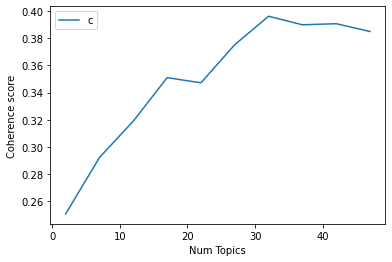

In [63]:
# Show graph
limit=end; start=srt; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [66]:
(np.argmax(coherence_values)*step)+srt

32

In [65]:
coherence_values

[0.25058495106814926,
 0.2921330315123739,
 0.3189541811177504,
 0.35094094953283084,
 0.3471444669903433,
 0.37522080920391715,
 0.3961686337240368,
 0.3898664579175625,
 0.3906670693407771,
 0.3849195763642595]